## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [1]:
import numpy as np
import matplotlib.pyplot as plt
def teste(n_lanci):
    lista_lanci= [np.random.choice([0,1]) for i in range(n_lanci)] #list of n. croci (0) and n. teste (1)
    n_teste= sum(lista_lanci)
    frequenza= (n_teste/n_lanci)*100
    print(f'Numero di teste su {n_lanci} lanci: {n_teste} -> {frequenza}%')

teste(10)

Numero di teste su 10 lanci: 7 -> 70.0%


In [2]:
campione_grande= np.arange(10,20000, 100)
frequenza= [(sum(np.random.choice([0,1]) for i in range(size))/size) for size in campione_grande]

KeyboardInterrupt: 

In [ ]:

plt.figure(figsize=(14,8))

plt.axhline(y=0.5, color='orange', linestyle='-', linewidth=5)

plt.plot(campione_grande, frequenza, color='blue')
plt.title('Numero medio di teste rispetto alla grandezza del campione')
plt.xlabel('Grandezza del campione')
plt.ylabel('Numero medio di teste')
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [3]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print(df.shape)      #Numero righe e colonne dataframe
print(df.isna().sum())       #Valori mancanti per colonna

(714, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64


In [4]:
moda_embarked = df['Embarked'].mode()[0]        
df['Embarked'].fillna(moda_embarked, inplace= True)      #riempio 'Embarked' con il valore più frequente

/tmp/ipykernel_951/1832554264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(moda_embarked, inplace= True)      #riempio 'Embarked' con il valore più frequente


In [5]:
df.dropna( subset='Age', inplace=True)      #Rimuovo le righe in cui l'età non è specificata

In [6]:
duplicati = df.duplicated().sum()       #Controllo se ci sono righe duplicate
print(duplicati)

0


In [7]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

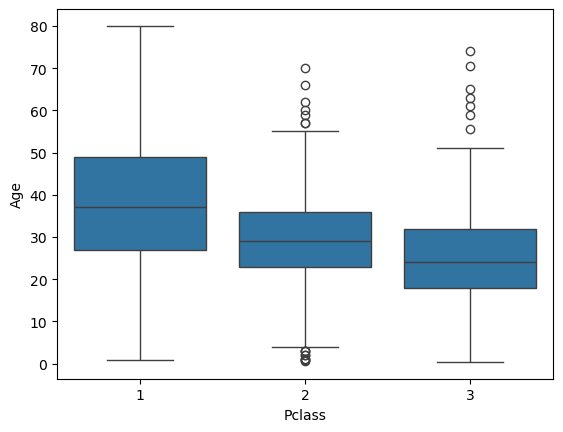

In [ ]:
sns.boxplot(data=df, x='Pclass', y='Age')
plt.show()

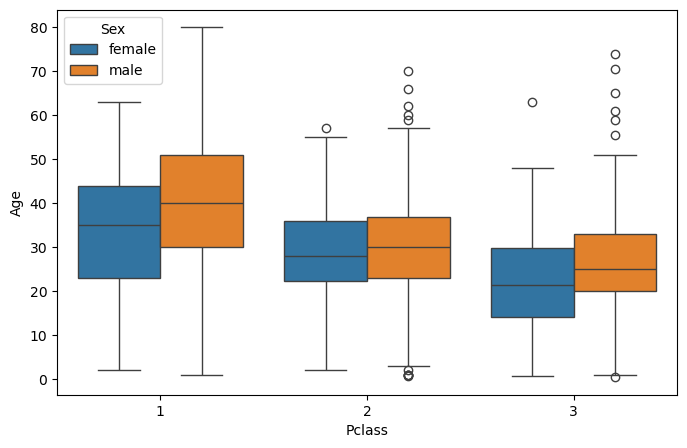

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [20]:
specie = df['species'].value_counts()
print(specie)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [19]:
media_petali = df.groupby('species')[['petal_length','petal_width']].mean()
print(media_petali)

            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


Text(0, 0.5, 'Larghezza del petalo (cm)')

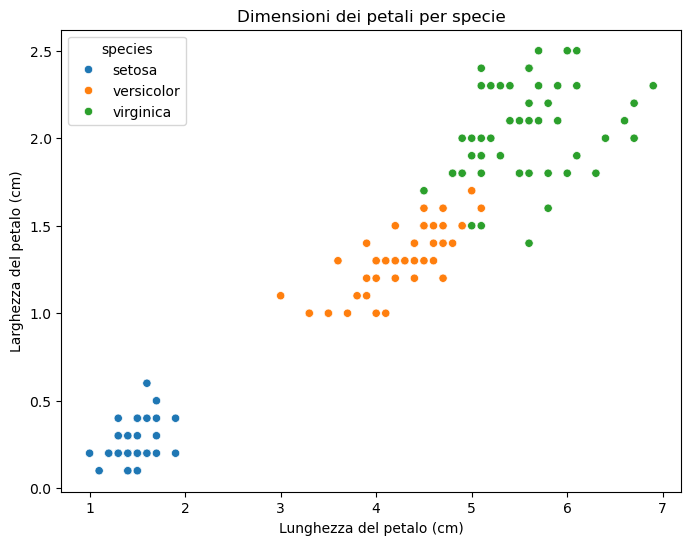

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='petal_length', y='petal_width', hue='species')
plt.title('Dimensioni dei petali per specie')
plt.xlabel('Lunghezza del petalo (cm)')
plt.ylabel('Larghezza del petalo (cm)')

In [30]:
df['petal_area'] = df['petal_length'] * df['petal_width']
area_petali = df.groupby('species')['petal_area'].describe()
print(area_petali)

            count     mean       std   min     25%     50%    75%    max
species                                                                 
setosa       50.0   0.3656  0.181155  0.11  0.2800   0.300   0.42   0.96
versicolor   50.0   5.7204  1.368403  3.30  4.8600   5.615   6.75   8.64
virginica    50.0  11.2962  2.157412  7.50  9.7175  11.445  12.79  15.87


Text(0, 0.5, 'Area del petalo (cm²)')

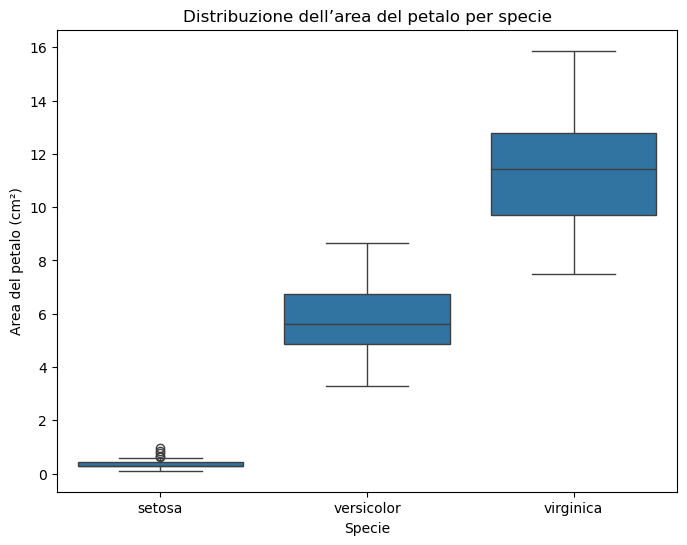

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(df, x='species', y='petal_area')
plt.title('Distribuzione dell’area del petalo per specie')
plt.xlabel('Specie')
plt.ylabel('Area del petalo (cm²)')